<a href="https://colab.research.google.com/github/MostafaFiroozi/Scratch-Assay-Analysis/blob/main/Scratch_Assay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**

# Adding Requierd Libs

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.filters import try_all_threshold
from skimage.color import rgb2gray
from skimage import io


# Importing The Image

(123, 166)


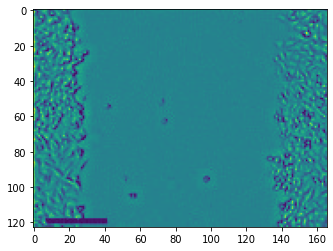

In [2]:
img = rgb2gray(io.imread("/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/0 hours.jpg"))
plt.imshow(img)
print(img.shape)


Applying Different Sizes of Entropy Filters






/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


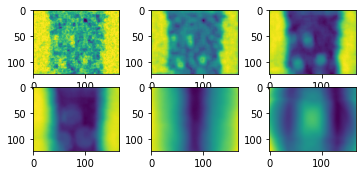

In [3]:
h, w=img.shape
entrpy_filtered_images=np.zeros((h,w,10))
j=0
for i in [2,5,10,20,50,100]:
  j+=1
  entrpy_filtered_images[:,:,j]= entropy(img, disk(i))
  plt.subplot(3,3,j)
  plt.imshow(entrpy_filtered_images[:,:,j])
  #So we decide for disk size of 5
entrpy_filtered_image=entropy(img, disk(5))

## Trying all the thresholds to choose for one

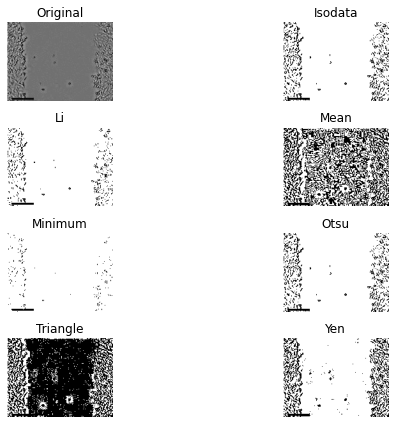

In [4]:
#First we show how would be our thresholds if we didn't use the entropy filter
fig, ax = try_all_threshold(img, figsize=(10, 6), verbose=False)
plt.show()

We saw that the thresholding without an entropy filter is not reasonable!

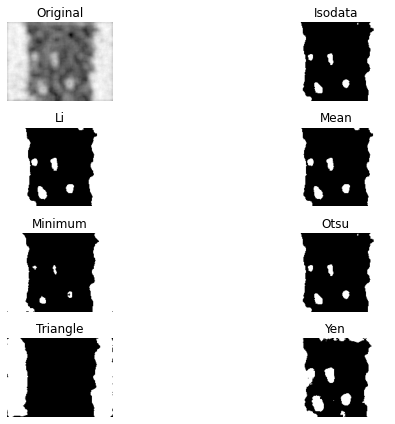

In [5]:
fig, ax = try_all_threshold(entrpy_filtered_image, figsize=(10, 6), verbose=False)
plt.show()

It seems that the "Minimum" Thresholding is the most reasonable one!

10183
The Percentage of Scratched part is: 49.87266137721618


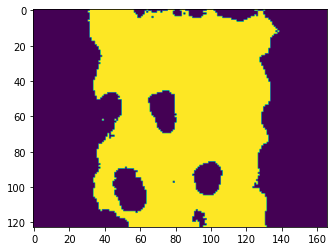

In [7]:
from skimage.filters import threshold_yen
threshold= threshold_yen(entrpy_filtered_image) #Calculating the threshold value using minimum
Scratch=entrpy_filtered_image < threshold #Extracting the scratched part using the threshold
plt.imshow(Scratch) #Showing the Scratch

print(np.sum(Scratch==1))
print("The Percentage of Scratched part is:",np.sum(Scratch==1)*100.0/(h*w))

## Looping on all the images to asses the healing process

/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/0 hours.jpg
['0 hours']
[49.87266137721618]
/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/1 hours.jpg
['0 hours', '1 hours']


/usr/local/lib/python3.7/dist-packages/skimage/filters/rank/generic.py:119: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  out_dtype)


[49.87266137721618, 51.91987462043295]
/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/3 hours .jpg
['0 hours', '1 hours', '3 hours ']
[49.87266137721618, 51.91987462043295, 52.59085120971692]
/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/12 hours.jpg
['0 hours', '1 hours', '3 hours ', '12 hours']
[49.87266137721618, 51.91987462043295, 52.59085120971692, 42.740828402366866]
/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/18 hours.jpg
['0 hours', '1 hours', '3 hours ', '12 hours', '18 hours']
[49.87266137721618, 51.91987462043295, 52.59085120971692, 42.740828402366866, 40.28261711188541]
/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/24 houres.jpg
['0 hours', '1 hours', '3 hours ', '12 hours', '18 hours', '24 houres']
[49.87266137721618, 51.91987462043295, 52.59085120971692, 42.740828402366866, 40.28261711188541, 18.447580645161292]


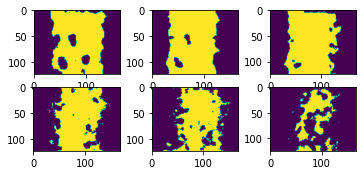

In [8]:
#time=[0,1,3,12,18,24]
time_list=[]
area_list=[]
i=1
path= "/content/drive/MyDrive/Colab Notebooks/Scratch Analysis/*.*"
for file in glob.glob(path):
  print(file)
  name=file[len(path)-3:-4]
  time_list.append(name)
  print(time_list)
  h, w=img.shape
  img = rgb2gray(io.imread(file))
  entrpy_filtered_image=entropy(img, disk(5))
  threshold= threshold_yen(entrpy_filtered_image) #Calculating the threshold value using minimum
  Scratch=entrpy_filtered_image < threshold #Extracting the scratched part using the threshold
  plt.subplot(3,3,i)
  i+=1
  plt.imshow(Scratch) #Showing the Scratch
  area=np.sum(Scratch==1)*100.0/(h*w)
  area_list.append(area)
  print(area_list)



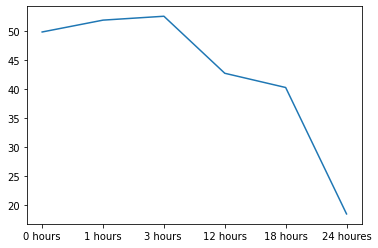

In [9]:
 plt.plot(time_list,area_list)

## Manifestation of Statistical Charactristics

In [19]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

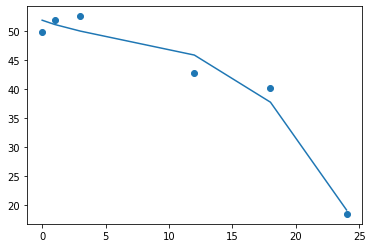

In [18]:
x=[0, 1 ,3 ,12 ,18 ,24]
mymodel = np.poly1d(np.polyfit(x,area_list,3))#We use a polinomeal of 3 to do the plot regression
plt.scatter(x, area_list)
plt.plot(x, mymodel(x))
plt.show()


In [21]:
print("The R-squered value is:",r2_score(area_list, mymodel(x)))

The R-squered value is: 0.9661248050718653


In [22]:
print(mymodel)

           3           2
-0.004081 x + 0.07491 x - 0.8126 x + 51.9
